<a href="https://colab.research.google.com/github/Raghad022/Task1/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read file

In [2]:
insurance_data= pd.read_csv("insurance.csv")
#Read the first ten samples
insurance_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
#Read the last five samples
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [4]:
#Show number of rows and columns
insurance_data.shape

(1338, 7)

# Data preprocessing

In [5]:
#information about data
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#check for missing value
insurance_data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [7]:
#numbers of duplicates
insurance_data.duplicated().sum()

1

In [8]:
#remove duplicates
insurance_data.drop_duplicates(inplace=True)
insurance_data.duplicated().sum()

0

In [9]:
#Sum of each category in a given column
insurance_data["sex"].value_counts()

,count
sex,
male,675
female,662


In [10]:
#show categries in sex column
insurance_data["sex"].unique()

array(['female', 'male'], dtype=object)

In [11]:
#reblace categry data to int data
insurance_data.replace({"sex":{'male':0,'female':1}},inplace=True)
insurance_data.head()

<ipython-input-11-9ed321a66615>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({"sex":{'male':0,'female':1}},inplace=True)


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [12]:
#check
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 83.6+ KB


In [13]:
#show categries in smoker column
insurance_data["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [14]:
#reblace categry data to int data
insurance_data.replace({"smoker":{"yes":1,"no":0}},inplace=True)
insurance_data.head(2)

<ipython-input-14-052587cac1f5>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({"smoker":{"yes":1,"no":0}},inplace=True)


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,southwest,16884.9240
1,18,0,33.77,1,0,southeast,1725.5523


In [15]:
#check
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 83.6+ KB


In [16]:
#show categries in region column
insurance_data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
#reblace categry data to int data
#another method
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
insurance_data['region']=le.fit_transform(insurance_data['region'])

In [18]:
#check
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


In [19]:
insurance_data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,0.019814,1.000000,-0.046397,-0.017848,-0.076596,-0.004936,-0.058044
bmi,0.109344,-0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,-0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,-0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,-0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,-0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


<Axes: >

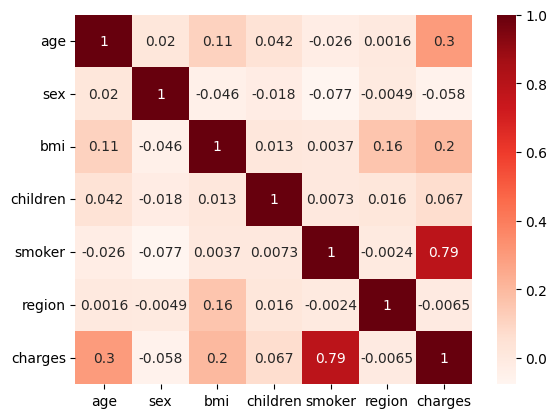

In [20]:
sns.heatmap(insurance_data.corr(), annot=True, cmap='Reds')

In [21]:
insurance_data.drop("region",inplace=True,axis=1)
insurance_data.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


# Data analysis

In [22]:
insurance_data.describe()

,age,sex,bmi,children,smoker,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.495138,30.663452,1.095737,0.204936,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,4746.344000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


# Univariate analysis

In [ ]:
#one numerical feature
plt.hist(x=insurance_data["age"],bins=5,color="Orange",edgecolor="Black")
plt.xlabel('age')
plt.ylabel('number of samples')
plt.title('The number of samples')
plt.show()

In [ ]:
#one numerical feature
sns.histplot(insurance_data['bmi'],kde=True)

In [ ]:
#one numerical feature
sns.boxplot(x=insurance_data["charges"])

In [ ]:
#one categorical feature
sns.countplot(x='smoker',data=insurance_data)

In [ ]:
#one categorical feature
sex_counts = insurance_data['sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts, autopct='%1.1f%%')

# Bivariate analysis

In [ ]:
#two numerical features
sns.scatterplot(data=insurance_data,x='age',y='charges')

In [ ]:
#two categorical features
sns.countplot(x='sex',hue='smoker',data=insurance_data)

In [ ]:
#categorical & numerical features
sns.boxplot(data=insurance_data,x="smoker",y="charges")

In [ ]:
sns.pairplot(insurance_data)

# Split the dataset

In [23]:
#Separating the specifications from the goal
X=insurance_data.drop(columns=['charges'],axis=1)
y=insurance_data['charges']

In [24]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
print(X.shape,X_train.shape,X_test.shape)

(1337, 5) (1069, 5) (268, 5)


# Feature Scaling Or Standardization

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

#  Building LinearRegression model

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)

y_pred=linreg.predict(X_test_scaled)
score=r2_score(y_test,y_pred)
print("R2 Score", score)

R2 Score 0.804621881177266


In [28]:
print('coefficient:',linreg.coef_)
print('intercept:',linreg.intercept_)

coefficient: [3485.35147941   42.49564092 1848.5563011   642.41632931 9223.78019753]
intercept: 13030.203369289053


# Evaluation LR model

In [ ]:
#Evaluation train sample
from sklearn.metrics import r2_score,mean_absolute_error
score=r2_score(y_train,linear_m.predict(X_train))
mae=mean_absolute_error(y_train,linear_m.predict(X_train))
print("r2:",score)
print("mea:",mae)

In [ ]:
#Evaluation test sample
score=r2_score(y_test,linear_m.predict(X_test))
mae=mean_absolute_error(y_test,linear_m.predict(X_test))
print("r2:",score)
print("mea:",mae)

In [ ]:
linear_m.predict(scaler.transform([[19,1,27.90,0,1]]))

In [ ]:
input_data = (28,0,33.000,3,0)

# changing the input_data to numpy array
input_data_as_np_array = np.asarray(input_data).reshape(1,-1)


scaled_data = scaler.transform(input_data_as_np_array)
predition = linear_m.predict(scaled_data)
print(predition)

# Building support vector regrission model

In [29]:
#kernel=linear
from sklearn.metrics import r2_score
from sklearn.svm import SVR
svr=SVR(kernel='linear')
svr.fit(X_train_scaled,y_train)

## Prediction
y_pred=svr.predict(X_test_scaled)

score=r2_score(y_test,y_pred)
print("R2 Score", score)

R2 Score -0.04164640423056509


In [30]:
#kernel=rbf
from sklearn.metrics import r2_score
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(X_train_scaled,y_train)

## Prediction
y_pred=svr.predict(X_test_scaled)

score=r2_score(y_test,y_pred)
print("R2 Score", score)

R2 Score -0.12828236866612985


In [31]:
#kernel=poly
from sklearn.metrics import r2_score
from sklearn.svm import SVR
svr=SVR(kernel='poly')
svr.fit(X_train_scaled,y_train)

## Prediction
y_pred=svr.predict(X_test_scaled)

score=r2_score(y_test,y_pred)
print("R2 Score", score)

R2 Score -0.11820618548714057


In [32]:
#kernel=sigmoid
from sklearn.metrics import r2_score
from sklearn.svm import SVR
svr=SVR(kernel='sigmoid')
svr.fit(X_train_scaled,y_train)

## Prediction
y_pred=svr.predict(X_test_scaled)

score=r2_score(y_test,y_pred)
print("R2 Score", score)

R2 Score -0.11964810684428895


# Building KNeighborsRegressor Model

In [33]:
#number of neighbors equal 15
from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor(n_neighbors=15)
regressor.fit(X_train_scaled,y_train)
y_pred=regressor.predict(X_test_scaled)

score=r2_score(y_test,y_pred)
print("R2 Score", score)

R2 Score 0.8773379100910514


In [34]:
#number of neighbors equal 7
from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor(n_neighbors=7)
regressor.fit(X_train_scaled,y_train)
y_pred=regressor.predict(X_test_scaled)

score=r2_score(y_test,y_pred)
print("R2 Score", score)

R2 Score 0.8711042286136351
